In [1]:
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd

2024-01-11 19:13:43.408021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 19:13:43.624103: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 19:13:46.087116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64:/usr/local/cuda-12.2/lib64
2024-01-11 19:13:46.087246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

## Load data

In [2]:
weather_data = pd.read_csv('data/weather.csv', header=None).to_numpy()

In [3]:
batch_size = 32
n_train = 36792
n_eval = 5271
n_test = 10540
train_loader, eval_loader, test_loader = get_loaders(weather_data, batch_size, n_train, n_eval, n_test, T=96, S=96)

## Train 

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
#writer = SummaryWriter()

cuda


In [5]:
N = 21 #nb variables
T = 96 #input length (lookback window)
D = 512 # 256 ou 512
S = 96 # 96 ou 192, 336, 720
proj_dim = 512
num_blocks = 2 #2 ou 3 ou 4 (nombre de block de transformer)

itransformer = iTransformer(N, T, D, S, proj_dim, num_blocks).to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-4, weight_decay=1e-5) #10−3, 5 × 10−4, 10−4 


In [6]:
loss_values, loss_eval = train(itransformer, optimizer, train_loader, eval_loader, 10, device)

---- epoch :  0
loss train : 0.4774148408209851
loss eval : 0.38196773725895233
---- epoch :  1
loss train : 0.4489893154440076
loss eval : 0.3764184966315458
---- epoch :  2
loss train : 0.435577215466067
loss eval : 0.37662714774961825
---- epoch :  3
loss train : 0.42559238147143186
loss eval : 0.37874900181720283
---- epoch :  4
loss train : 0.41434224816437065
loss eval : 0.3824049684184569
Early stopping after 4 epochs without improvement.


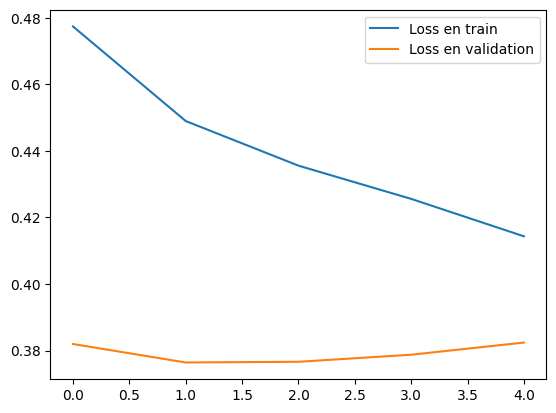

In [7]:
plt.figure()
plt.plot(loss_values,label="Loss en train")
plt.plot(loss_eval,label="Loss en validation")
plt.legend()
plt.show()

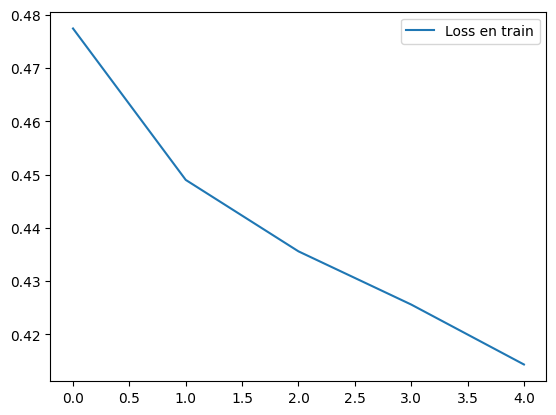

In [8]:
plt.figure()
plt.plot(loss_values,label="Loss en train")
plt.legend()
plt.show()

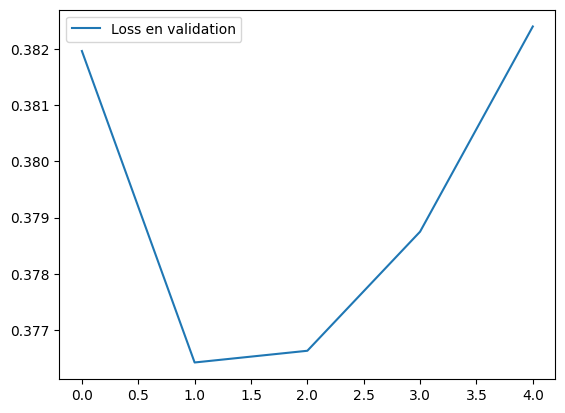

In [9]:
plt.figure()
plt.plot(loss_eval,label="Loss en validation")
plt.legend()
plt.show()

## Test

In [10]:
loss_test, loss_mae, target, yhat = test(itransformer, test_loader, device)
print("MSE : ", loss_test)
print("MAE : ", loss_mae)

MSE :  0.1721531965677845
MAE :  0.21314473946889242


Affichage pour une modalité sur toute la durée de la prédiction

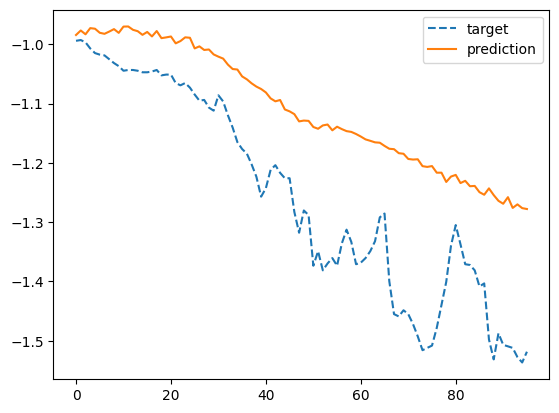

In [11]:
i = 1
plt.figure()
plt.plot(target[0,:,i].to("cpu"), "--", label="target")
plt.plot(yhat[0,:,i].to("cpu"),label="prediction")
plt.legend()
plt.show()


Affichage de toutes les modalités à un instant t

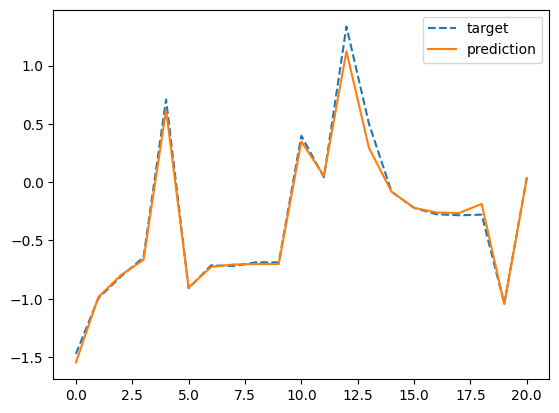

In [12]:

plt.figure()
plt.plot(target[0,0,:].to("cpu"), "--", label="target")
plt.plot(yhat[0,0,:].to("cpu"),label="prediction")
plt.legend()
plt.show()